# Dataset

In [1]:
!wget https://raw.githubusercontent.com/rmarcacini/text-collections/master/complete_texts_csvs/re8.csv

--2023-01-03 19:42:50--  https://raw.githubusercontent.com/rmarcacini/text-collections/master/complete_texts_csvs/re8.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4649304 (4.4M) [text/plain]
Saving to: ‘re8.csv’

re8.csv             100%[===================>]   4.43M  --.-KB/s    in 0.07s   

2023-01-03 19:42:50 (63.9 MB/s) - ‘re8.csv’ saved [4649304/4649304]



In [2]:
!pip install git+https://github.com/AlvaroJoseLopes/Deep-Walk-Transformers.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/AlvaroJoseLopes/Deep-Walk-Transformers.git to /tmp/pip-req-build-3_sv1rcx
  Running command git clone --filter=blob:none --quiet https://github.com/AlvaroJoseLopes/Deep-Walk-Transformers.git /tmp/pip-req-build-3_sv1rcx
  Resolved https://github.com/AlvaroJoseLopes/Deep-Walk-Transformers.git to commit 533e8a031cc212bb31e803f46613e395b3690d8b
  Preparing metadata (setup.py) ... done
  Cloning https://github.com/AlvaroJoseLopes/graph-walker to /tmp/pip-install-k2qqqt7s/graph-walker_e6c3d54b40334482a49e6c1758e5b509
  Running command git clone --filter=blob:none --quiet https://github.com/AlvaroJoseLopes/graph-walker /tmp/pip-install-k2qqqt7s/graph-walker_e6c3d54b40334482a49e6c1758e5b509
  Resolved https://github.com/AlvaroJoseLopes/graph-walker to commit b8710bc3bb4daa8212fef1d9c12a1451e5dd56c6
  Installing build dependencies ... done
  Getting requirements to bui

In [3]:
from sklearn.cluster import KMeans
import numpy as np
from sklearn.metrics.cluster import normalized_mutual_info_score
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import numpy as np
from sklearn.manifold import TSNE
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

def evaluate(df_embed, labels):
    # avaliando com clustering
    # kmeans = KMeans(n_clusters=len(np.unique(labels)), random_state=0).fit(df_emb_train)
    # kmeans.labels_
    # print('---> DeepWalk Transformers (clustering): ', normalized_mutual_info_score(kmeans.labels_, labels))

    # avaliando com classificacao
    print("\n\n\n---> DeepWalk Transformers (classification)")
    clf_train, clf_test, clf_train_y, clf_test_y  = train_test_split(df_embed, labels, test_size=0.3, random_state=42)
    clf = LinearSVC()
    clf.fit(clf_train, clf_train_y)
    print(classification_report(clf_test_y, clf.predict(clf_test)))

In [4]:
import pandas as pd 

df = pd.read_csv('re8.csv')
df

,file_name,text,class
0,acq.4342.txt,mcdowell me to merger with interpharm inc mcdo...,acq
1,acq.5302.txt,intermagnetics general inma completes buy inte...,acq
2,acq.8530.txt,tesco extends hillards offer tesco plc tsco l ...,acq
3,acq.3841.txt,healthvest hvt sells shares healthvest a maryl...,acq
4,acq.6302.txt,cooper canada said it received takeover offers...,acq
...,...,...,...
7669,trade.1829.txt,japan will not retaliate now against u s tarif...,trade
7670,trade.4403.txt,koreans to buy billion dlrs in u s goods south...,trade
7671,trade.6944.txt,belgolux trade swings into january deficit the...,trade
7672,trade.7420.txt,nakasone to visit washington in late april pri...,trade


In [5]:
df['label'] = df['class'].astype('category').cat.codes
df

,file_name,text,class,label
0,acq.4342.txt,mcdowell me to merger with interpharm inc mcdo...,acq,0
1,acq.5302.txt,intermagnetics general inma completes buy inte...,acq,0
2,acq.8530.txt,tesco extends hillards offer tesco plc tsco l ...,acq,0
3,acq.3841.txt,healthvest hvt sells shares healthvest a maryl...,acq,0
4,acq.6302.txt,cooper canada said it received takeover offers...,acq,0
...,...,...,...,...
7669,trade.1829.txt,japan will not retaliate now against u s tarif...,trade,7
7670,trade.4403.txt,koreans to buy billion dlrs in u s goods south...,trade,7
7671,trade.6944.txt,belgolux trade swings into january deficit the...,trade,7
7672,trade.7420.txt,nakasone to visit washington in late april pri...,trade,7


In [6]:
df = df.sample(frac=1).reset_index(drop=True)
df

,file_name,text,class,label
0,acq.5801.txt,air canada to comment on gelco gec unit report...,acq,0
1,earn.2718.txt,republic american corp rawc o rd qtr net oper ...,earn,2
2,earn.6478.txt,multi media sees year end loss multi media bar...,earn,2
3,earn.1314.txt,royal business group inc roy nd qtr march one ...,earn,2
4,acq.2272.txt,microsemi mscc o acquires hybrid components mi...,acq,0
...,...,...,...,...
7669,earn.4786.txt,kidston says higher net reflects gold sale ris...,earn,2
7670,earn.2224.txt,rochester community savings bank rcsb o nd sec...,earn,2
7671,crude.6887.txt,caltex to raise bahrain oil product prices cal...,crude,1
7672,acq.2470.txt,rochester rtc acquires canton telephone co roc...,acq,0


In [7]:
!pip install -U sentence-transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 KB 4.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 34.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 79.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 182.4/182.4 KB 24.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 78.3 MB/s eta 0:00:00
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125938 sha256=d3ce112db68ae8ee66e0e113fde369b3ccce1e18942f9986bf3a82ded7837aaf
  Stored in directory: /root/.cache/pip/wheels/5e/6f/8c/d88aec621f3f542d26fac0342bef5e693335d125f4e54aeffe
Successfully built sentence-transformers


In [8]:
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('paraphrase-MiniLM-L6-v2')


embeddings = model.encode(df.text.to_list())


Downloading:   0%|          | 0.00/690 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/3.69k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/629 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/122 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/314 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/229 [00:00<?, ?B/s]

In [9]:
df['embeddings'] = list(embeddings)
df

,file_name,text,class,label,embeddings
0,acq.5801.txt,air canada to comment on gelco gec unit report...,acq,0,"[-0.19042781, 0.026440935, -0.06788826, -0.009..."
1,earn.2718.txt,republic american corp rawc o rd qtr net oper ...,earn,2,"[-0.20954482, -0.31252497, -0.09274312, 0.0066..."
2,earn.6478.txt,multi media sees year end loss multi media bar...,earn,2,"[-0.36709654, -0.363315, 0.57979083, -0.315111..."
3,earn.1314.txt,royal business group inc roy nd qtr march one ...,earn,2,"[0.047068313, -0.25696492, -0.056037106, -0.28..."
4,acq.2272.txt,microsemi mscc o acquires hybrid components mi...,acq,0,"[-0.25400773, -0.038656343, -0.019745585, 0.01..."
...,...,...,...,...,...
7669,earn.4786.txt,kidston says higher net reflects gold sale ris...,earn,2,"[-0.06821335, -0.112527475, 0.20498407, 0.2488..."
7670,earn.2224.txt,rochester community savings bank rcsb o nd sec...,earn,2,"[-0.008987068, -0.38911524, 0.02298745, 0.1039..."
7671,crude.6887.txt,caltex to raise bahrain oil product prices cal...,crude,1,"[-0.5565065, -0.0566144, -0.121797696, 0.05888..."
7672,acq.2470.txt,rochester rtc acquires canton telephone co roc...,acq,0,"[-0.7438082, -0.10051813, 0.25493696, -0.03554..."


# Construindo o Grafo

In [10]:
from sklearn.neighbors import kneighbors_graph
import numpy as np
A = kneighbors_graph(np.array(df['embeddings'].to_list()), n_neighbors=5, metric="cosine")

In [11]:
import networkx as nx 
G = nx.Graph(A)

In [12]:
G.number_of_nodes()

7674

# Pegando uma amostra do grafo usando Edge Sampling

In [13]:
max_size = G.number_of_nodes() // 1.25
max_size

6139.0

In [14]:
import random
# Tentando otimizar
class TIES():
    def __init__(self, seed=42):
        random.seed(seed)
        self.G_sample = nx.Graph()

    def sample(self, G, max_size = 30000):
        # Shuffling edges and keeping track of index of edge to be sampled
        edges = list(G.edges())
        random.shuffle(edges)
        idx_edges = 0

        # Step 1: Edge based node sampling        
        while self.G_sample.number_of_nodes() < max_size:
            u,v = edges[idx_edges]
            self.G_sample.add_edge(u,v)
            idx_edges += 1

        # Step 2: Graph induction
        nodes_sample = set(self.G_sample.nodes())
        for v in self.G_sample.nodes():
            neighbors = G.neighbors(v)
            valid_neighbors = nodes_sample.intersection(neighbors)

            for neigh in valid_neighbors:
                self.G_sample.add_edge(v, neigh)

        return self.G_sample

In [15]:
%%time
ties = TIES()
sampled = ties.sample(G, max_size=max_size)
sampled.number_of_nodes(), sampled.number_of_edges()

CPU times: user 303 ms, sys: 9.62 ms, total: 312 ms
Wall time: 331 ms


(6139, 21978)

# Utilizando a API

In [18]:
num_walks = 50
walk_len = 10
embed_dim = 32
mask_rate = 0.5
starting_nodes = None
batch_size = 128
epochs = 4
lr = 0.0001

## Obtendo os embeddings transdutivamente.

In [19]:
from deep_walk_transformers.deep_walk_transformers import DeepWalkTransformers
dwt = DeepWalkTransformers(
    num_walks,
    walk_len,
    mask_rate,
    embed_dim
)
dwt.fit(sampled, starting_nodes, batch_size, epochs, lr)

Random walks - T=0.16s
Walks shape: (306950, 10)


Building X_paths and X_positions:   0%|          | 0/306950 [00:00<?, ?it/s]

Getting Vectorize Layer ...
Encoding texts ...
Getting masked input (mask token id = 6141) ...
Building Masked Language Bert Model ...
Fake Training MLM model ... 
Epoch 1/4
eh pra entrar aqui!!!
eh pra entrar aqui!!!
2399/2399 [==============================] - 23s 9ms/step - loss: 8.6888
Epoch 2/4
2399/2399 [==============================] - 20s 9ms/step - loss: 8.6321
Epoch 3/4
2399/2399 [==============================] - 20s 8ms/step - loss: 8.5994
Epoch 4/4
2399/2399 [==============================] - 21s 9ms/step - loss: 8.5768


In [20]:
transductive_node_embeddings = dwt.get_transductive_embeddings()
df_embed_transductive = pd.DataFrame.from_dict(transductive_node_embeddings, orient='index')

9593/9593 [==============================] - 25s 3ms/step


In [21]:
df_embed_transductive.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
224,-1.953535,-1.304578,-0.871200,-1.870581,1.855104,0.443219,-1.046043,0.808092,-1.211654,1.502742,...,-0.605210,1.100463,-0.094383,1.825417,1.406055,1.990643,-1.265910,1.396364,-0.722669,1.293376
4284,-2.161782,-1.003029,-0.807421,-2.422354,1.880370,0.003741,-0.707379,0.613656,-1.053720,1.329032,...,-0.299598,1.129364,-0.099006,1.839049,1.310727,2.113588,-1.306720,1.578564,-0.654538,1.264403
5947,0.565124,-0.647330,-1.427349,1.036054,0.270716,1.070140,-1.169998,1.307414,-1.417421,0.667040,...,-2.184804,1.751065,-0.074684,0.361609,-0.674538,0.334430,0.296857,0.813234,-1.835680,1.486182
6827,0.593771,-0.465136,-1.332633,1.060439,0.064926,0.922868,-1.101528,1.157089,-1.424438,0.626135,...,-1.971138,1.733560,-0.066678,0.226614,-0.914490,0.243077,0.384105,0.778848,-1.751396,1.365226
1188,-2.144665,-1.115201,-0.839341,-2.354145,1.909496,0.149216,-0.920744,0.651288,-1.112660,1.469405,...,-0.388840,1.135506,-0.113305,1.905825,1.404703,2.248098,-1.285357,1.634786,-0.669614,1.276958


In [22]:
df_embed_transductive.shape

(6139, 32)

In [23]:
np.sum(list(sampled.nodes()) == df_embed_transductive.index)

6139

In [24]:
labels = df.iloc[df_embed_transductive.index].label.to_list()

In [25]:
evaluate(df_embed_transductive, labels)




---> DeepWalk Transformers (classification)
              precision    recall  f1-score   support

           0       0.52      0.55      0.53       570
           1       0.38      0.06      0.11        78
           2       0.64      0.84      0.73       915
           3       0.00      0.00      0.00        12
           4       0.17      0.04      0.07        69
           5       0.67      0.03      0.05        72
           6       0.00      0.00      0.00        36
           7       0.00      0.00      0.00        90

    accuracy                           0.59      1842
   macro avg       0.30      0.19      0.19      1842
weighted avg       0.53      0.59      0.53      1842



/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_

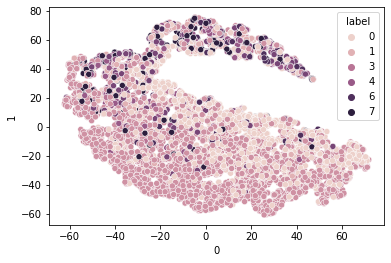

In [26]:
import seaborn as sns
from sklearn.manifold import TSNE
X_embedded = TSNE(n_components=2, learning_rate='auto',
                  init='random').fit_transform(df_embed_transductive)

df_tsne = pd.DataFrame(X_embedded)
df_tsne['label'] = labels
sns.scatterplot(data=df_tsne, x=0, y=1, hue="label")

## Obtendo embeddings indutivamente

In [27]:
nodes_of_sampled = set(sampled.nodes())
nodes_of_fullGraph = set(G.nodes())
starting_nodes = list(nodes_of_fullGraph.difference(nodes_of_sampled))

In [28]:
len(nodes_of_fullGraph) == len(nodes_of_sampled) + len(starting_nodes)

True

In [29]:
inductive_node_embeddings = dwt.get_inductive_embeddings(G, starting_nodes)
df_embed_inductive = pd.DataFrame.from_dict(inductive_node_embeddings, orient='index')

Random walks - T=0.08s
Walks shape: (76750, 10)


/usr/local/lib/python3.8/dist-packages/walker/preprocessing.py:14: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A = nx.adjacency_matrix(G).astype(np.float32)


Building X_paths and X_positions:   0%|          | 0/76750 [00:00<?, ?it/s]

Getting Vectorize Layer ...
Encoding texts ...
2399/2399 [==============================] - 6s 3ms/step


In [30]:
df_embed_inductive.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,-2.007216,-0.905347,-0.801759,-2.264016,1.736831,0.118567,-0.721622,0.696231,-1.087958,1.269342,...,-0.325187,1.201422,-0.088123,1.666094,1.121535,2.000762,-1.120867,1.468362,-0.624570,1.240130
5,-1.675163,-0.897875,-0.989004,-1.847311,1.597512,0.240180,-0.803230,0.822635,-1.134427,1.159950,...,-0.664159,1.341754,-0.090164,1.610431,0.967808,1.831437,-0.998324,1.540084,-0.916339,1.290192
16,-2.212960,-1.086333,-0.803750,-2.401957,1.942105,0.167821,-0.758544,0.692638,-1.098314,1.465085,...,-0.343567,1.126120,-0.118688,1.903627,1.343967,2.100083,-1.324772,1.590469,-0.614758,1.244075
24,-1.820093,-1.239957,-0.886542,-1.932067,1.740099,0.297979,-0.852051,0.719408,-1.028697,1.349669,...,-0.607638,1.221484,-0.109635,1.724128,1.205590,1.982950,-1.163214,1.541683,-0.889175,1.341850
28,-2.266066,-1.215294,-0.778630,-2.427175,1.939548,0.082732,-0.864752,0.729047,-1.030468,1.448416,...,-0.311038,1.099475,-0.043307,1.911900,1.530366,2.208555,-1.374933,1.486569,-0.541198,1.187901


In [31]:
df_embed_inductive.shape

(1535, 32)

In [32]:
labels = df.iloc[df_embed_inductive.index].label.to_list()
evaluate(df_embed_inductive, labels)




---> DeepWalk Transformers (classification)
              precision    recall  f1-score   support

           0       0.55      0.57      0.56       146
           1       0.00      0.00      0.00        20
           2       0.66      0.82      0.73       238
           3       0.00      0.00      0.00         3
           4       0.29      0.25      0.27         8
           5       0.33      0.04      0.08        23
           6       0.00      0.00      0.00        10
           7       0.00      0.00      0.00        13

    accuracy                           0.61       461
   macro avg       0.23      0.21      0.20       461
weighted avg       0.54      0.61      0.56       461



/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_

In [33]:
np.sum(df_embed_inductive.index == starting_nodes)

1535

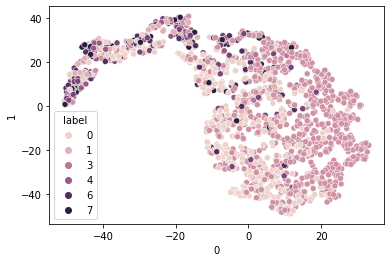

In [34]:
import seaborn as sns
from sklearn.manifold import TSNE
X_embedded = TSNE(n_components=2, learning_rate='auto',
                  init='random').fit_transform(df_embed_inductive)

df_tsne = pd.DataFrame(X_embedded)
df_tsne['label'] = labels
sns.scatterplot(data=df_tsne, x=0, y=1, hue="label")

## Avaliando conjuntamente

In [35]:
df_embed = pd.concat([df_embed_transductive, df_embed_inductive])
df_embed.shape

(7674, 32)

In [36]:
df_embed.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
224,-1.953535,-1.304578,-0.871200,-1.870581,1.855104,0.443219,-1.046043,0.808092,-1.211654,1.502742,...,-0.605210,1.100463,-0.094383,1.825417,1.406055,1.990643,-1.265910,1.396364,-0.722669,1.293376
4284,-2.161782,-1.003029,-0.807421,-2.422354,1.880370,0.003741,-0.707379,0.613656,-1.053720,1.329032,...,-0.299598,1.129364,-0.099006,1.839049,1.310727,2.113588,-1.306720,1.578564,-0.654538,1.264403
5947,0.565124,-0.647330,-1.427349,1.036054,0.270716,1.070140,-1.169998,1.307414,-1.417421,0.667040,...,-2.184804,1.751065,-0.074684,0.361609,-0.674538,0.334430,0.296857,0.813234,-1.835680,1.486182
6827,0.593771,-0.465136,-1.332633,1.060439,0.064926,0.922868,-1.101528,1.157089,-1.424438,0.626135,...,-1.971138,1.733560,-0.066678,0.226614,-0.914490,0.243077,0.384105,0.778848,-1.751396,1.365226
1188,-2.144665,-1.115201,-0.839341,-2.354145,1.909496,0.149216,-0.920744,0.651288,-1.112660,1.469405,...,-0.388840,1.135506,-0.113305,1.905825,1.404703,2.248098,-1.285357,1.634786,-0.669614,1.276958


In [37]:
labels = df.iloc[df_embed.index].label.to_list()
evaluate(df_embed, labels)




---> DeepWalk Transformers (classification)
              precision    recall  f1-score   support

           0       0.48      0.55      0.51       669
           1       0.31      0.03      0.06       117
           2       0.66      0.83      0.74      1183
           3       0.00      0.00      0.00        14
           4       0.20      0.04      0.06        79
           5       0.50      0.03      0.06       102
           6       0.00      0.00      0.00        31
           7       0.00      0.00      0.00       108

    accuracy                           0.59      2303
   macro avg       0.27      0.19      0.18      2303
weighted avg       0.52      0.59      0.53      2303



/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_

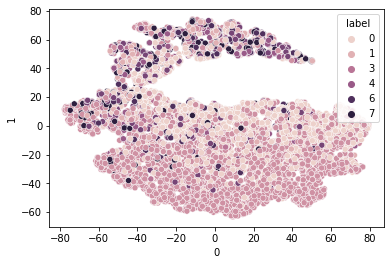

In [38]:
import seaborn as sns
from sklearn.manifold import TSNE
X_embedded = TSNE(n_components=2, learning_rate='auto',
                  init='random').fit_transform(df_embed)

df_tsne = pd.DataFrame(X_embedded)
df_tsne['label'] = labels
sns.scatterplot(data=df_tsne, x=0, y=1, hue="label")